In [11]:
import numpy as np
import numpy.random as nr
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
import seaborn as sns
import math


In [12]:
df = pd.read_csv('clean_data_with_Agegroup') 

In [13]:
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16404 entries, 0 to 16403
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            16404 non-null  int64  
 1   CustomerID            16404 non-null  int64  
 2   FirstName             16404 non-null  object 
 3   LastName              16404 non-null  object 
 4   AddressLine1          16404 non-null  object 
 5   City                  16404 non-null  object 
 6   StateProvinceName     16404 non-null  object 
 7   CountryRegionName     16404 non-null  object 
 8   PostalCode            16404 non-null  object 
 9   PhoneNumber           16404 non-null  object 
 10  BirthDate             16404 non-null  object 
 11  Education             16404 non-null  object 
 12  Occupation            16404 non-null  object 
 13  Gender                16404 non-null  object 
 14  MaritalStatus         16404 non-null  object 
 15  HomeOwnerFlag      

In [14]:
categorical_columns = ['Education', 
                       'Occupation', 'Gender', 
                       'MaritalStatus', 
                       'agegroup','HomeOwnerFlag']

for cate in categorical_columns:
    print(df[cate].unique)


<bound method Series.unique of 0             Bachelors 
1             Bachelors 
2             Bachelors 
3             Bachelors 
4             Bachelors 
              ...       
16399    Graduate Degree
16400    Graduate Degree
16401    Graduate Degree
16402    Graduate Degree
16403         Bachelors 
Name: Education, Length: 16404, dtype: object>
<bound method Series.unique of 0        Professional
1        Professional
2        Professional
3        Professional
4        Professional
             ...     
16399        Clerical
16400        Clerical
16401        Clerical
16402        Clerical
16403        Clerical
Name: Occupation, Length: 16404, dtype: object>
<bound method Series.unique of 0        M
1        M
2        M
3        F
4        F
        ..
16399    M
16400    M
16401    F
16402    M
16403    M
Name: Gender, Length: 16404, dtype: object>
<bound method Series.unique of 0        M
1        S
2        M
3        S
4        S
        ..
16399    S
16400    M
16401    S


In [15]:
def encode_string(cat_feature):
    
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)

    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()


In [16]:
# create a list of empty lists to store features
alist = [ [] for _ in range(df.shape[0]) ]
Features = np.array(alist)

for col in categorical_columns:
    temp = encode_string(df[col])
    print(col,temp.shape)
    Features = np.concatenate([Features, temp], axis = 1)

# used later to identify columns to start scaling
start_num_idx = Features.shape[1] 

print(Features.shape)
print(Features[:2, :])   # first two sample rows 



Education (16404, 5)
Occupation (16404, 5)
Gender (16404, 2)
MaritalStatus (16404, 2)
agegroup (16404, 4)
HomeOwnerFlag (16404, 2)
(16404, 20)
[[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]]


In [17]:
numerical_columns = ['NumberCarsOwned','NumberChildrenAtHome',
                     'TotalChildren',
                     'YearlyIncome'] 

Features = np.concatenate([Features, np.array(df[numerical_columns])], axis = 1)

np.set_printoptions(suppress=True)
Features[:3,:]
print(Features.shape[0])


16404


In [18]:
nr.seed(777)
labels = np.array(np.log(df['AveMonthSpend'])) #take log of AveMonthSpend

print(labels)
indx = range(Features.shape[0])

test_size = int(0.3*Features.shape[0])
indx = ms.train_test_split(indx, test_size = test_size)

x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]]) # note in log scale

x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])  # note in log scale

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(start_num_idx)


[4.48863637 4.76217393 4.81218436 ... 3.87120101 4.17438727 4.27666612]
(11483, 24) (11483,)
(4921, 24) (4921,)
20


In [19]:
# Apply scaling on numerical columns
scaler = preprocessing.StandardScaler().fit(x_train[:,start_num_idx:])

x_train[:,start_num_idx:] = scaler.transform(x_train[:,start_num_idx:])
x_test[:,start_num_idx:] = scaler.transform(x_test[:,start_num_idx:])
print(x_train.shape)
x_train[:3,:]


(11483, 24)


array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.44298606, -0.648844  ,  0.00357006, -0.79280791],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -0.44298606, -0.648844  , -1.18469065, -0.77500411],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
  

In [20]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)



LinearRegression(fit_intercept=False)

In [21]:
# print model parameters
print(lin_mod.intercept_)
print(lin_mod.coef_, lin_mod.coef_.shape[0])


0.0
[-9.63310379e+10 -9.63310379e+10 -9.63310379e+10 -9.63310379e+10
 -9.63310379e+10  1.64937211e+11  1.64937211e+11  1.64937211e+11
  1.64937211e+11  1.64937211e+11  3.73538333e+10  3.73538333e+10
  5.17261120e+10  5.17261120e+10 -6.37079296e+10 -6.37079296e+10
 -6.37079296e+10 -6.37079296e+10 -9.39781888e+10 -9.39781888e+10
 -5.67781102e-03  1.96072177e-01 -2.03174528e-03  8.67185179e-02] 24


In [22]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

y_score = lin_mod.predict(x_test) 

y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
print(y_score_untransform)
print(y_test_untransform)
print_metrics(y_test_untransform, y_score_untransform, lin_mod.coef_.shape[0]+1)    # coef + 1 in-tercept 


[49.10753332 57.80016193 76.94992666 ... 46.24008423 53.02624864
 97.32727063]
[48. 52. 74. ... 48. 56. 97.]
Mean Square Error      = 14.00172419543366
Root Mean Square Error = 3.741887784986832
Mean Absolute Error    = 2.907829941860452
Median Absolute Error  = 2.3449686224275013
R^2                    = 0.9806999977185017
Adjusted R^2           = 0.9806053898641807


D:\Project\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


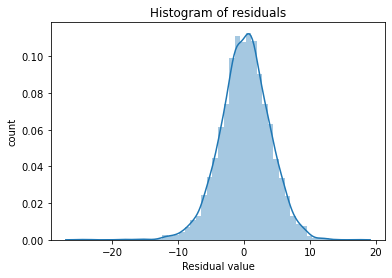

In [23]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
#hist_resids(y_test, y_score)   
hist_resids(y_test_untransform, y_score_untransform)   


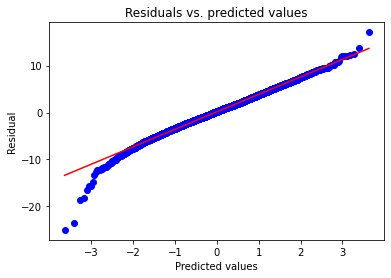

In [24]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test_untransform, y_score_untransform)   
#resid_qq(y_test, y_score)   



D:\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


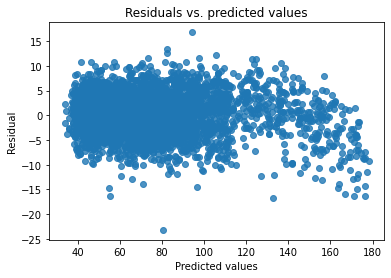

In [24]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
#resid_plot(y_test, y_score) 
resid_plot(y_test_untransform, y_score_untransform) 



In [49]:
# this portion to read AW_test.csv, clean and test
missing_value_formats=['n.a.','?','NA','n/a','na','--', 'null']
aw_test = pd.read_csv('AW_test.csv', na_values=missing_value_formats)
aw_test.drop_duplicates(subset='CustomerID', keep='last', inplace=True)
print(aw_test.shape, aw_test.columns)



(500, 23) Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')


In [50]:
aw_test.isnull().sum()

CustomerID                0
Title                   496
FirstName                 0
MiddleName              216
LastName                  0
Suffix                  499
AddressLine1              0
AddressLine2            487
City                      0
StateProvinceName         0
CountryRegionName         0
PostalCode                0
PhoneNumber               0
BirthDate                 0
Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
YearlyIncome              0
dtype: int64

In [51]:
aw_test.drop(columns=['Title','MiddleName','Suffix','AddressLine2'],inplace=True,axis=1)

In [52]:
aw_test.isnull().sum()
aw_test.shape

(500, 19)

In [53]:
def convert_bdate_age(birthDate, collectionDate):
    
    diff = collectionDate - birthDate
    age = diff.dt.days.div(365).astype(int)
    return age
    
aw_cDate = pd.to_datetime('1998-01-01')
aw_test['BirthDate'] = pd.to_datetime(df['BirthDate'])    
aw_bDate = aw_test['BirthDate']
aw_age = convert_bdate_age(aw_bDate, aw_cDate)
aw_test['age'] = aw_age



In [54]:
numGroups = 10
bins=[0,25,45,55,120]
label=['0-25','25-45','45-55','55-120']

aw_ageCats = pd.cut(aw_test['age'], bins=bins, labels=label)
aw_test['agegroup'] = aw_ageCats



In [55]:
aw_test.to_csv('clean_aw_test.csv')
aw_test = pd.read_csv('clean_aw_test.csv')
aw_test.columns  #there are NO BikeBuyer and AveMonthSpend
aw_test.shape
aw_test.columns

Index(['Unnamed: 0', 'CustomerID', 'FirstName', 'LastName', 'AddressLine1',
       'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'age',
       'agegroup'],
      dtype='object')

In [56]:
# create a list of empty lists to store features
aw_alist = [ [] for _ in range(aw_test.shape[0]) ]
aw_Features = np.array(aw_alist)

for col in categorical_columns:
    temp = encode_string(aw_test[col])
    print(col,temp.shape)
    aw_Features = np.concatenate([aw_Features, temp], axis = 1)
    
# used later to identify columns to start scaling
aw_start_num_idx = aw_Features.shape[1] 

print(aw_Features.shape)
print(aw_Features[:2, :])   # first two sample rows 

aw_Features = np.concatenate([aw_Features, np.array(aw_test[numerical_columns])], axis = 1)
aw_Features[:2,:]
aw_Features.shape



Education (500, 5)
Occupation (500, 5)
Gender (500, 2)
MaritalStatus (500, 2)
agegroup (500, 4)
HomeOwnerFlag (500, 2)
(500, 20)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]]


(500, 24)

In [57]:
# Apply scaling on numerical columns
aw_scaler = preprocessing.StandardScaler().fit(aw_Features[:,aw_start_num_idx:])
aw_Features[:,aw_start_num_idx:] = aw_scaler.transform(aw_Features[:,aw_start_num_idx:])
print(aw_Features.shape)
aw_Features[:3,:]


(500, 24)


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.35928859, -0.72107754,  1.6591036 ,  0.12653132],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.35928859,  0.53297036,  1.06909521,  0.45161083],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
  

In [59]:
aw_scores = lin_mod.predict(aw_Features) 
aw_scores_untransform = np.exp(aw_scores) #get back due to initial log



In [60]:
pd_scores = pd.Series(aw_scores_untransform)
pd_id = aw_test['CustomerID']
newdf = pd.concat([pd_id, pd_scores], axis=1)
newdf.reset_index()


,index,CustomerID,0
0,0,18988,47.661335
1,1,29135,102.352012
2,2,12156,53.394863
3,3,13749,84.983669
4,4,27780,54.452967
...,...,...,...
495,495,24211,49.226069
496,496,23627,81.240603
497,497,14500,76.298107
498,498,22223,54.503259


In [61]:
np.savetxt('RegressionResults.csv', newdf, delimiter=',', fmt='%d %f')



